In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def generate():
    X = []
    Y = []
    sampling_rate = 1000
    duration = 2
    amplitude = 1
    frequency = 1
    phase = 0
    x = np.linspace(0, duration, int(duration*sampling_rate), endpoint=False)
    sin_wave = amplitude*np.sin(2*np.pi*frequency*x + phase)
    X.append(sin_wave[:-1])
    Y.append(sin_wave[1:])
    return np.array(X), np.array(Y)

In [14]:
X, Y = generate()

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

print(X.shape, Y.shape)

torch.Size([1, 1999]) torch.Size([1, 1999])


In [32]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

input_size = 1
hidden_size = 40
output_size = 1

model = SimpleRNN(input_size, hidden_size, output_size)

In [33]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))
    loss = criterion(outputs, Y.unsqueeze(2))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10 == 0:
        print(f' Epoch: {epoch+1}/{num_epochs} , Loss: {loss.item():.4f}')

 Epoch: 1/50 , Loss: 0.3857
 Epoch: 11/50 , Loss: 0.0138
 Epoch: 21/50 , Loss: 0.0028
 Epoch: 31/50 , Loss: 0.0004
 Epoch: 41/50 , Loss: 0.0006


In [34]:
model.eval()

SimpleRNN(
  (rnn): RNN(1, 40, batch_first=True)
  (fc): Linear(in_features=40, out_features=1, bias=True)
)

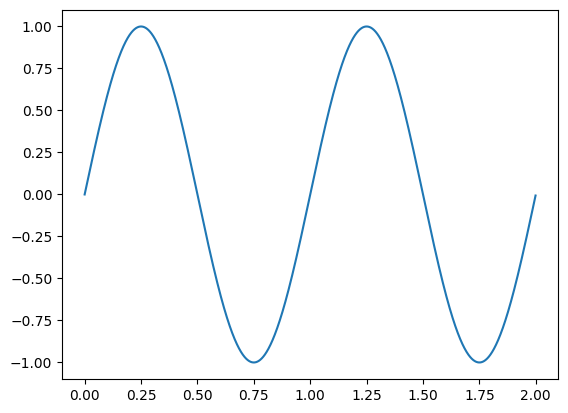

In [38]:
def plo():
    sampling_rate = 1000
    duration = 2
    amplitude = 1
    frequency = 1
    phase = 0
    x = np.linspace(0, duration, int(duration*sampling_rate), endpoint=False)
    sin_wave = amplitude*np.sin(2*np.pi*frequency*x + phase)
    plt.plot(x, sin_wave)
plo()

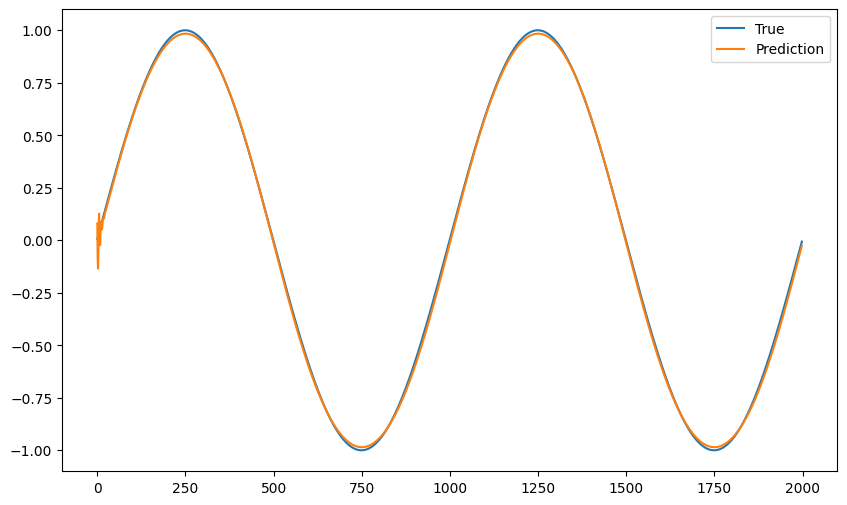

In [36]:
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

plt.figure(figsize=(10, 6))
plt.plot(Y[0].numpy(), label="True")
plt.plot(predictions[0], label="Prediction")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [21]:
a = r2_score(predictions[0], Y[0].numpy())

In [22]:
print("accuracy: ", a)

accuracy:  -674.9136352539062
